# `Этот блокнот жрет 7Gb оперативки`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk

from nltk import ngrams, FreqDist

In [3]:
font = {'size'   : 14}
plt.rc('font', **font)

# First look on data

In [4]:
data = pd.read_csv("main_table.csv")

In [5]:
data.sample(5).T

,1552460,1762375,2500581,869466,2572160
_id,53e9afdab7602d9703a2d98d,53e9b331b7602d9703e01de0,5488ddad45ce147a86de4c6d,53e9a50eb7602d9702e2eb18,5550409f45ce0a409eb3580a
title,A database design for uniform representation o...,Potential and optimal control of human head mo...,Web-based remote video monitoring system imple...,Dynamic Positioning Nonlinear Control System o...,Unsupervised Prosodic Labeling of Speech Synth...
year,1994.0,2014.0,2012.0,2013.0,2014.0
n_citation,2.0,17.0,1.0,1.0,2.0
lang,en,en,en,en,en
page_start,619,519,NaN,455,1449
page_end,624,529,NaN,462,1460
volume,NaN,50,8334,8,97-D
issue,NaN,2,NaN,2,6
issn,NaN,0005-1098,0277-786X,NaN,NaN


# Statistics 
### Without preprocesing of Data

In [6]:
unique_vals = dict()
unique_vals_len = dict()
nan_count = dict()
for col in data:
    unique_vals[col] = data[col].unique() 
    unique_vals_len[col] = len(data[col].unique())
    nan_count[col] = (1 - len(data[data[col].notnull()][col]) / data.shape[0]) * 100

In [7]:
unique_vals_len = {k: v for k, v in sorted(unique_vals_len.items(), key=lambda item: item[1], reverse=True)}
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1], reverse=True)}

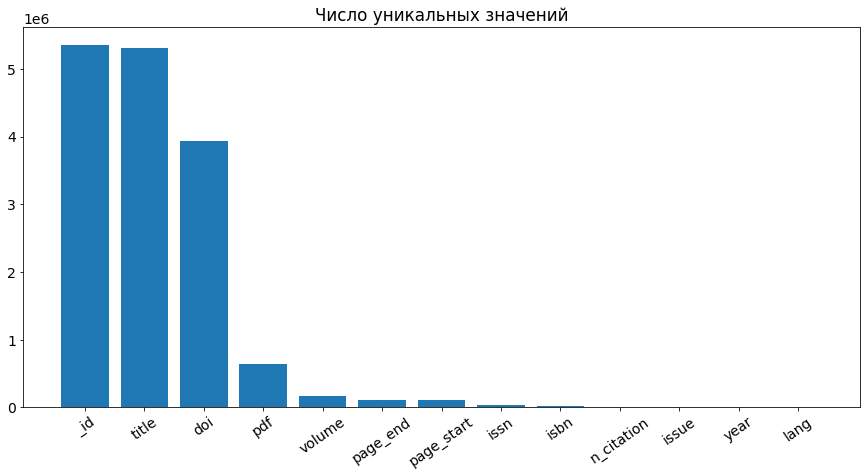

In [8]:
plt.figure(figsize=(15,7))
plt.title("Число уникальных значений")
plt.bar(unique_vals_len.keys(), unique_vals_len.values())
plt.tick_params(axis='x', rotation=35)
pass

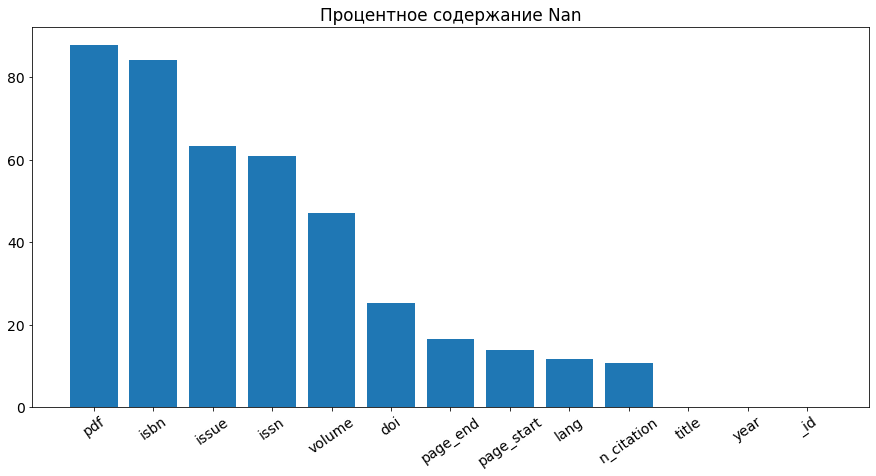

In [9]:
plt.figure(figsize=(15,7))
plt.title("Процентное содержание Nan")
plt.bar(nan_count.keys(), nan_count.values())
plt.tick_params(axis='x', rotation=35)
pass

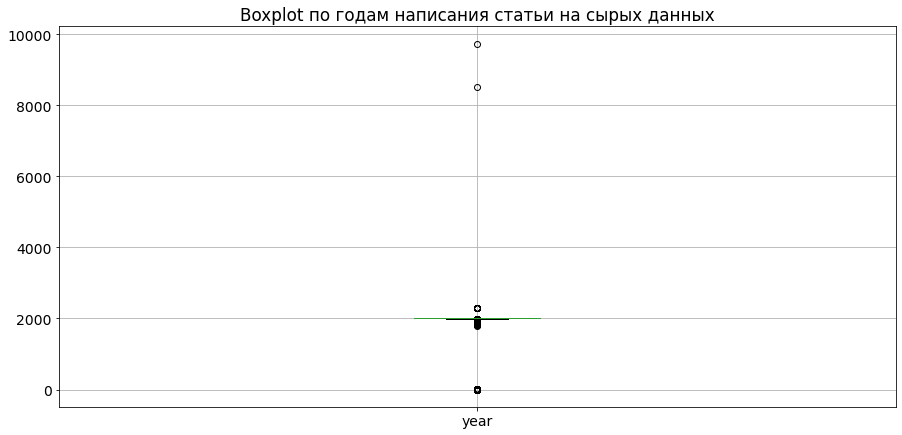

In [10]:
plt.figure(figsize=(15,7))
plt.title("Boxplot по годам написания статьи на сырых данных")
data.boxplot(column=["year"])
pass

### Чутка прибрался 

<AxesSubplot:>

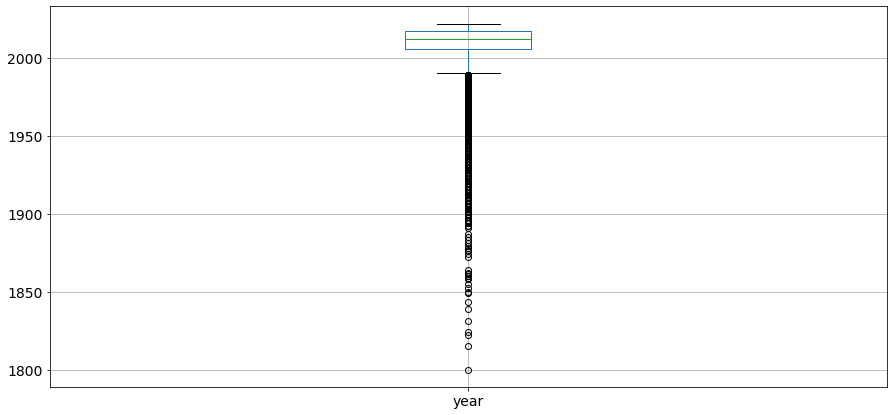

In [11]:
plt.figure(figsize=(15,7))
data.loc[data["year"]>2100] = 2000
data.loc[data["year"]<1500] = 2000
data.boxplot(column=["year"])

<BarContainer object of 2 artists>

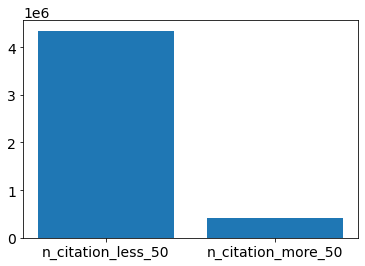

In [33]:
n_citation_less_50 = data[data["n_citation"] < 50].shape[0]
n_citation_more_50 = data[data["n_citation"] > 50].shape[0]
names = ["n_citation_less_50", "n_citation_more_50"]
plt.bar(names, [n_citation_less_50, n_citation_more_50])

In [15]:
titles = list(data[data["title"].notnull()]["title"])

In [21]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = []
for title in titles:
    try:
        if isinstance(title, str):
            tokens += tokenizer.tokenize(title.lower())
    except TypeError:
        print(title)

In [22]:
all_counts = dict()
all_counts[1] = FreqDist(ngrams(tokens, 1))

In [23]:
def plot_most_common_words(num):
    most_common = all_counts[1].most_common(num)
    words = []
    freqs = []
    for i in range(num):
        words += [most_common[i][0][0]]
        freqs += [most_common[i][1]]
    plt.figure(figsize=(15,7))
    plt.title("Частота появления слов в названиях")
    plt.bar(words, freqs)
    plt.tick_params(axis='x', rotation=35)
    return words, freqs

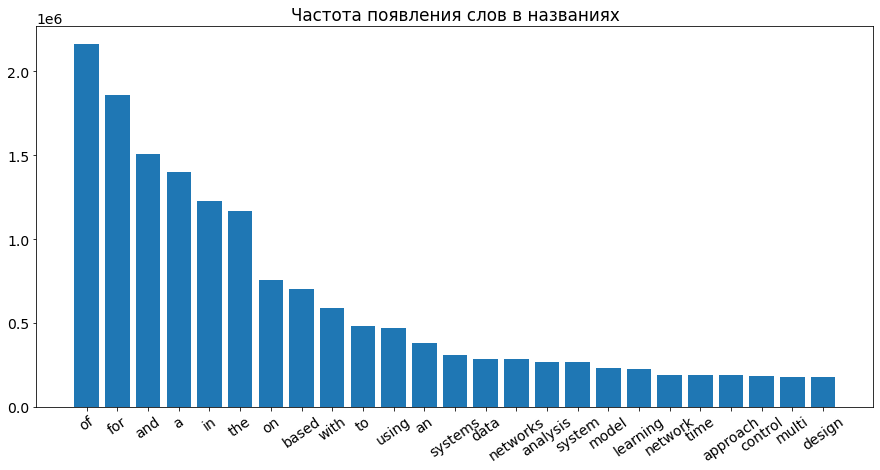

In [24]:
_, _ = plot_most_common_words(25)